# Helper Functions

In [3]:
import numpy as np

def create_box(center, hsize):
    d1 = np.array([hsize[0], 0.0, 0.0])
    d2 = np.array([0.0, hsize[1], 0.0])
    d3 = np.array([0.0, 0.0, hsize[2]])
    
    oobb = []
    oobb.append(center - d1 - d2 - d3)
    oobb.append(center + d1 - d2 - d3)
    oobb.append(center - d1 + d2 - d3)
    oobb.append(center + d1 + d2 - d3)
    oobb.append(center - d1 - d2 + d3)
    oobb.append(center + d1 - d2 + d3)
    oobb.append(center - d1 + d2 + d3)
    oobb.append(center + d1 + d2 + d3)
    
    return np.array(oobb)

# Good Feasibility: Box on Box

Measure of Infeasibility: 5.764113534989592e-07, includes a hover penalty of 0.0


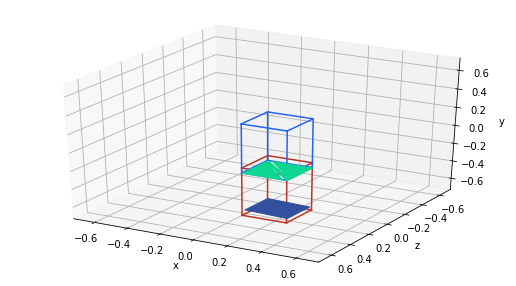

In [4]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
from compute_moi import *
from compute_moi_util import *

options = {
    "output_level": 3,
    "max_iterations": 1000,
    "dump_models": False,
    "surface_area_tolerance": 0.003,
    "print_surface_area_histogramm": True
}

# Create Scene
oobbs = []
oobbs.append(create_box(np.array([0.50, 0.75, 0.00]), np.array([0.125, 0.125, 0.25])))
oobbs.append(create_box(np.array([0.50, 0.75, 0.45]), np.array([0.125, 0.125, 0.25])))

# Calculate MoI
res = moi_from_bounding_boxes(oobbs, options)
print("Measure of Infeasibility: {}, includes a hover penalty of {}".format(str(res.moi), str(res.hover_penalty)))

# Draw Scene
fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')
draw_oobbs(ax, res.oobbs[:-1])
draw_contact_surfaces(ax, res.contact_surfaces)

# Mild Infeasibility: Box Partially on Box

Measure of Infeasibility: 2.6310737397658404e-06, includes a hover penalty of 0.0


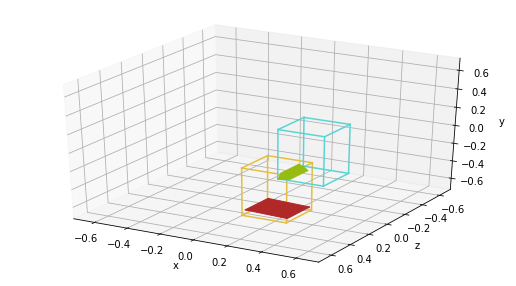

In [5]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
from compute_moi import *
from compute_moi_util import *

options = {
    "output_level": 3,
    "max_iterations": 1000,
    "dump_models": False,
    "surface_area_tolerance": 0.003,
    "print_surface_area_histogramm": True
}

# Create Scene
oobbs = []
oobbs.append(create_box(np.array([0.50, 0.75, 0.00]), np.array([0.125, 0.125, 0.25])))
oobbs.append(create_box(np.array([0.50 + 0.2, 0.75, 0.45]), np.array([0.125, 0.125, 0.25])))

# Calculate MoI
res = moi_from_bounding_boxes(oobbs, options)
print("Measure of Infeasibility: {}, includes a hover penalty of {}".format(str(res.moi), str(res.hover_penalty)))

# Draw Scene
fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')
draw_oobbs(ax, res.oobbs[:-1])
draw_contact_surfaces(ax, res.contact_surfaces)

# Infeasible: Hovering Box

In [2]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
from compute_moi import *
from compute_moi_util import *

options = {
    "output_level": 3,
    "max_iterations": 1000,
    "dump_models": False,
    "surface_area_tolerance": 0.003,
    "print_surface_area_histogramm": True
}

# Create Scene
oobbs = []
oobbs.append(create_box(np.array([0.50, 0.75, 0.00]), np.array([0.125, 0.125, 0.25])))
oobbs.append(create_box(np.array([0.50, 0.75, 1.00]), np.array([0.125, 0.125, 0.25])))
oobbs.append(create_box(np.array([0.50, 0.75, 1.45]), np.array([0.125, 0.125, 0.25])))

# Calculate MoI
res = moi_from_bounding_boxes(oobbs, options)
print("Hovering meshes: {}".format(str(res.hover_meshes)))
print("Measure of Infeasibility: {}, includes a hover penalty of {}".format(str(res.moi), str(res.hover_penalty)))

# Draw Scene
fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')
draw_oobbs(ax, res.oobbs[:-1])
draw_contact_surfaces(ax, res.contact_surfaces)

Hovering meshes: [1, 2]
Measure of Infeasibility: 2.375029252421617, includes a hover penalty of 2.375


# Infeasible: Box attached to the bottom of a table

Hovering meshes: []
Measure of Infeasibility: 0.0066349589100191154, includes a hover penalty of 0.0


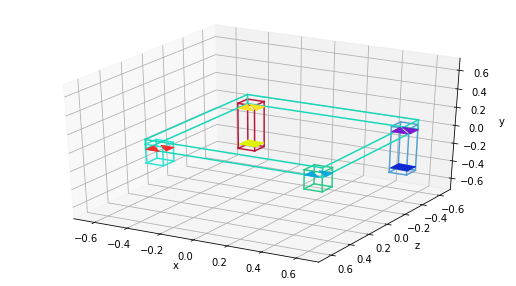

In [19]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
from compute_moi import *
from compute_moi_util import *

options = {
    "output_level": 3,
    "max_iterations": 1000,
    "dump_models": False,
    "surface_area_tolerance": 0.003,
    "print_surface_area_histogramm": True
}

# Create Scene
oobbs = []
oobbs.append(create_box(np.array([-0.2, -0.2, 0.00]), np.array([0.05, 0.05, 0.25])))
oobbs.append(create_box(np.array([ 0.7, -0.2, 0.00]), np.array([0.05, 0.05, 0.25])))
oobbs.append(create_box(np.array([ 0.7,  0.7, 0.15]), np.array([0.05, 0.05, 0.10])))
oobbs.append(create_box(np.array([-0.2,  0.7, 0.15]), np.array([0.05, 0.05, 0.10])))

oobbs.append(create_box(np.array([0.25, 0.25, 0.25]), np.array([0.5, 0.5, 0.05])))

# Calculate MoI
res = moi_from_bounding_boxes(oobbs, options)
print("Hovering meshes: {}".format(str(res.hover_meshes)))
print("Measure of Infeasibility: {}, includes a hover penalty of {}".format(str(res.moi), str(res.hover_penalty)))

# Draw Scene
fig = plt.figure(figsize=(9, 5))
extent = 0.7
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.set_xlim(-extent, extent)
ax.set_ylim(extent, -extent)
ax.set_zlim(-extent, extent)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_proj_type('persp')
draw_oobbs(ax, res.oobbs[:-1])
draw_contact_surfaces(ax, res.contact_surfaces)